<a href="https://colab.research.google.com/github/samuelbirhanu-sw/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/Titanic_KNN_with_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!git clone https://github.com/samuelbirhanu-sw/Data-Preprocessing-for-ML-using-Titanic-Dataset.git

Cloning into 'Data-Preprocessing-for-ML-using-Titanic-Dataset'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 2.69 MiB | 14.57 MiB/s, done.


In [35]:
import os
os.chdir("Data-Preprocessing-for-ML-using-Titanic-Dataset")
os.listdir()

['.git', 'titanic2.csv', 'README.md', 'Machine_Learning.ipynb']

In [36]:
import pandas as pd

df = pd.read_csv("titanic2.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# -----------------------------------------
# 1. IMPORT LIBRARIES
# -----------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# -----------------------------------------
# 2. LOAD DATA
# -----------------------------------------
df = pd.read_csv("titanic2.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# Drop unnecessary columns if they exist
cols_to_drop = ["Name", "Ticket", "Cabin"]
df = df.drop([c for c in cols_to_drop if c in df.columns], axis=1)


In [39]:
# Fill missing Age with median
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [40]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [41]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [42]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')



In [43]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Pclass'] = df['Pclass'].fillna(df['Pclass'].mode()[0])


In [44]:
df['AgeClass'] = df['Age'] * df['Pclass']


In [45]:
label_cols = ['Sex', 'Embarked']

for col in label_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col])


In [46]:
X = df.drop("Survived", axis=1)
y = df["Survived"]


In [47]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Safety net: fill any leftover NaN with median
X = X.fillna(X.median())


In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [51]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
FamilySize,0


In [52]:
import numpy as np
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [53]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# fill using TRAIN statistics
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].median())


In [54]:
cat_cols = X_train.select_dtypes(include=['object']).columns

for col in cat_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])


In [55]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [56]:
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())


NaN in X_train: PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
AgeClass       0
dtype: int64
NaN in X_test: PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
AgeClass       0
dtype: int64


In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


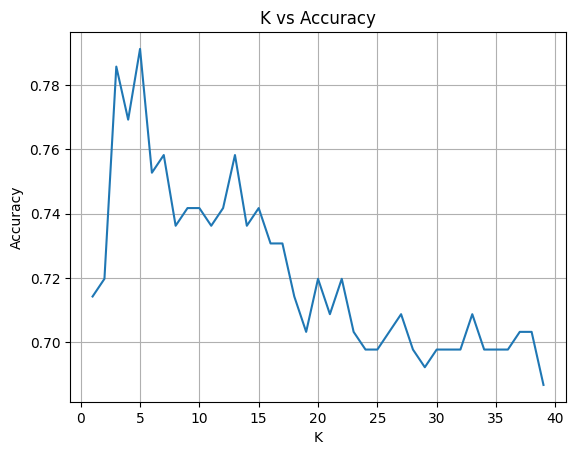

5

In [59]:
accuracy_scores = []
ks = range(1, 40)

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(ks, accuracy_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.grid(True)
plt.show()

best_k = ks[np.argmax(accuracy_scores)]
best_k


In [60]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Best K =", best_k)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best K = 5
Accuracy = 0.7912087912087912

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.82      0.70      0.75        83

    accuracy                           0.79       182
   macro avg       0.80      0.78      0.79       182
weighted avg       0.79      0.79      0.79       182

